# 作業

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

In [7]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('data/lena.png')

## Affine Transformation - Case 2: any three point

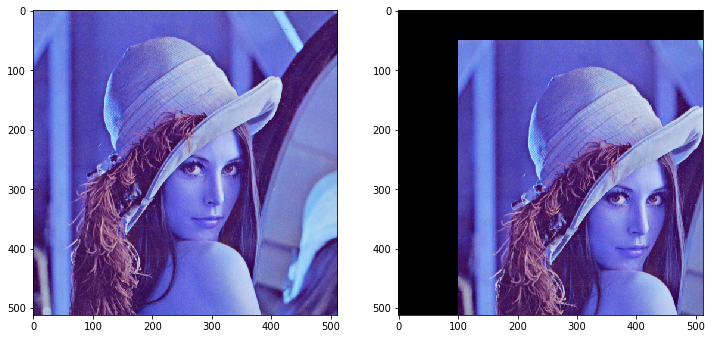

In [18]:
#平移
M = np.float32([[1,0,100],[0,1,50]])
rows,cols = img.shape[:2]
res = cv2.warpAffine(img,M,(rows,cols)) #需要图像、变换矩阵、变换后的大小
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(res)

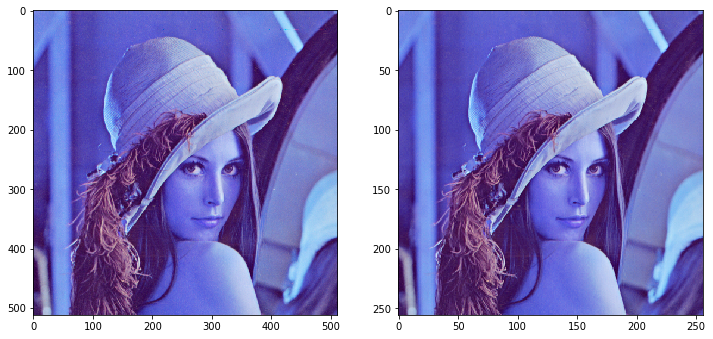

In [20]:
# 縮放
height,width = img.shape[:2]
res1 = cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(res1)

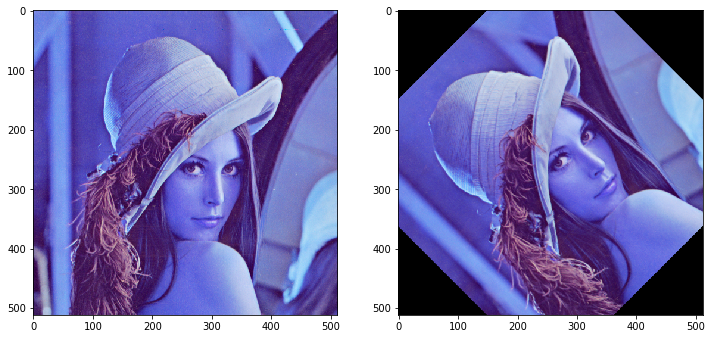

In [21]:
# 旋轉

rows,cols = img.shape[:2]
#第一个参数旋转中心，第二个参数旋转角度，第三个参数：缩放比例
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
#第三个参数：变换后的图像大小
res = cv2.warpAffine(img,M,(rows,cols))

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(res)

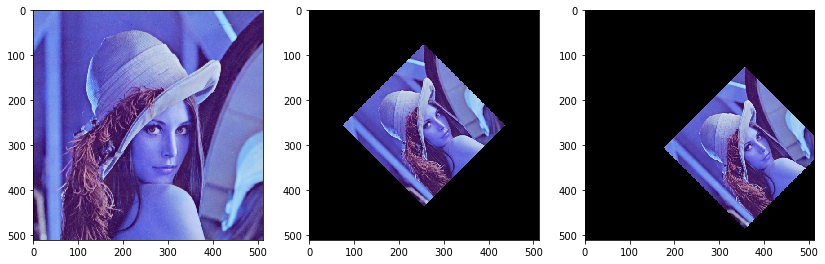

In [31]:
#旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)
rows,cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,0.5)
res = cv2.warpAffine(img,M,(rows,cols))

M = np.float32([[1,0,100],[0,1,50]])
res1=cv2.warpAffine(res,M,(rows_1,cols_1))

plt.figure(figsize=(14,14))
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(res)
plt.subplot(133)
plt.imshow(res1)

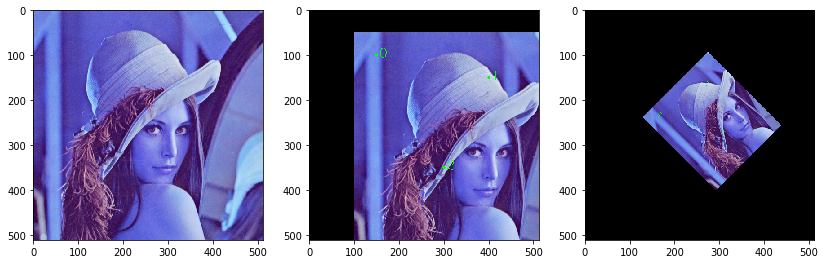

In [34]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
rows, cols = img.shape[:2]
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)


# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

# 取得 affine 矩陣並做 affine 操作    
M_1 = np.float32([[1,0,100],[0,1,50]])
M_2 = cv2.getRotationMatrix2D((cols/2,rows/2),45,0.5)
res1 = cv2.warpAffine(img_copy,M_1,(rows,cols))
res2 = cv2.warpAffine(res1,M_2,(rows,cols))
    
# 組合 + 顯示圖片
plt.figure(figsize=(14,14))
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(res1)
plt.subplot(133)
plt.imshow(res2)